<a href="https://colab.research.google.com/github/Neoneto/Coding_Dojo_Week_4/blob/main/Recreate_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recreate Graph
Submitted by Kenneth Alaba

## Loading the data

In [23]:
# Import the pandas library
import pandas as pd


In [24]:
# Load the data

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Opening the file
filename = '/content/drive/My Drive/Coding Dojo/03 Week 3: Exploratory Viz/mortgages.csv'

## Storing the data in olympic_df
mortgage_df = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Display the info of the dataframe
mortgage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [26]:
# Display the first few rows
mortgage_df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


## 30 Year Mortgage

In [27]:
# Create a filter for mortgage name
name_filter = mortgage_df['Mortgage Name'] == '30 Year'

# Apply the filter and 'count' the number of results
len(mortgage_df.loc[name_filter])

720

## 3% and 5% Interest Rate

In [28]:
# Create a filter for 3% interest rate
rate3_filter = mortgage_df['Interest Rate'] == 0.03 #converted to decimal

# Apply the filter
mortgage_df.loc[rate3_filter]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
895,176,13706.74,2762.33,34.26,2728.07,10978.67,15 Year,0.03
896,177,10978.67,2762.33,27.44,2734.89,8243.78,15 Year,0.03
897,178,8243.78,2762.33,20.60,2741.73,5502.05,15 Year,0.03
898,179,5502.05,2762.33,13.75,2748.58,2753.47,15 Year,0.03


In [29]:
# Apply the interest rate filter (3%) and the mortgage name filter
# (same with the previously defined filter)
# Stores the result in a new dataframe
namerate3_df = mortgage_df[name_filter & rate3_filter]

# Shows the resulting dataframe
namerate3_df

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
355,356,8364.12,1686.42,20.91,1665.51,6698.61,30 Year,0.03
356,357,6698.61,1686.42,16.74,1669.68,5028.93,30 Year,0.03
357,358,5028.93,1686.42,12.57,1673.85,3355.08,30 Year,0.03
358,359,3355.08,1686.42,8.38,1678.04,1677.04,30 Year,0.03


In [30]:
# Apply the mortgage name filter and the complementary of the interest rate filter (5%)
# Assumes that there are only exactly two possible values for the interest rate 
# Stores the result in a new dataframe
namerate5_df = mortgage_df[name_filter & ~rate3_filter]

# Show the resulting dataframe
namerate5_df

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05
...,...,...,...,...,...,...,...,...
715,356,10596.54,2147.29,44.15,2103.14,8493.40,30 Year,0.05
716,357,8493.40,2147.29,35.38,2111.91,6381.49,30 Year,0.05
717,358,6381.49,2147.29,26.58,2120.71,4260.78,30 Year,0.05
718,359,4260.78,2147.29,17.75,2129.54,2131.24,30 Year,0.05


## Cumulative Sum of Interest paid

In [31]:
# Calculate the cummulative sum of the Interest Paid for the two new dataframes 
cumsum3 = namerate3_df['Interest Paid'].cumsum()
cumsum5 = namerate5_df['Interest Paid'].cumsum()

# Shows the first 3 results in the cummulative sum for 3% interest
cumsum3[:3]

0    1000.00
1    1998.28
2    2994.84
Name: Interest Paid, dtype: float64

## Creating a Graph

In [32]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cummulative Interest (in USD)')

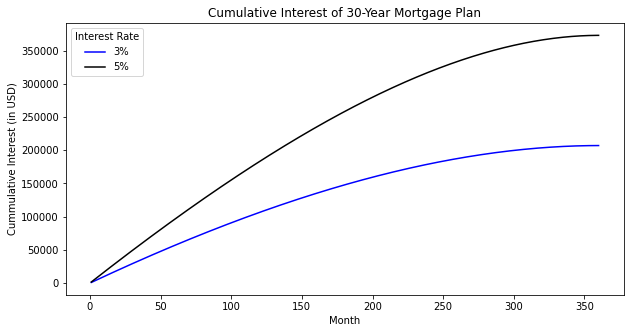

In [33]:
# Sets the figure size of the plot
plt.figure(figsize = (10,5))

# Plots the 2 dataframes in the sasme figure
plt.plot(namerate3_df['Month'], cumsum3, c = 'b', label = '3%') #blue line
plt.plot(namerate5_df['Month'], cumsum5, c = 'k', label = '5%') #black line

# Grooms the plot
# Creates a legend
plt.legend( title = 'Interest Rate')
# Sets and shows the plot title
plt.title('Cumulative Interest of 30-Year Mortgage Plan')
# Set and show the axes labels
plt.xlabel('Month')
plt.ylabel('Cummulative Interest (in USD)')



This graph shows that for both the 3% and 5% interest rates, the interest accumulates faster at the beginning of the mortgage as signified by the steep curves. The accumulation then slows down near the end of the mortgage as signified by the gentler curve.

# Recreate Graph Part 2

(0.0, 391618.09149999975)

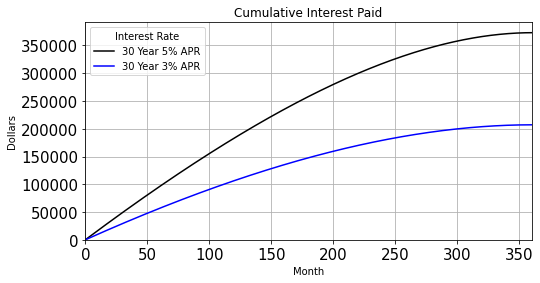

In [37]:
# Sets the figure size of the plot
plt.figure(figsize = (8,4))

# Plots the 2 dataframes in the sasme figure
plt.plot(namerate5_df['Month'], cumsum5, c = 'k', label = '30 Year 5% APR') #black line
plt.plot(namerate3_df['Month'], cumsum3, c = 'b', label = '30 Year 3% APR') #blue line


# Grooms the plot
# Creates a legend
plt.legend( title = 'Interest Rate')
# Sets and shows the plot title
plt.title('Cumulative Interest Paid')
# Set and show the axes labels
plt.xlabel('Month')
plt.ylabel('Dollars')

# Set the fontsize of the ticks
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15) 

# Shows the grid
plt.grid()

# Set the axis limits
plt.xlim(0, max(namerate3_df['Month']))
plt.ylim(0)

